In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

#import lightgbm as lbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns', 500)

X_train = pd.read_csv("data/X_train.csv", index_col=0, error_bad_lines=False)
X_test = pd.read_csv("data/X_test.csv", index_col=0, error_bad_lines=False)
X_train.head(3)

b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau
1,2,2486.0,2254.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,NaN,en l'état,NaN,NaN,True,ITT Océanic,NaN,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay)
2,3,1536.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Nûmph,NaN,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry


In [3]:
y_train = pd.read_csv("data/y_train.csv", index_col=0)


In [4]:
X_train.shape, X_test.shape

((8880, 30), (2960, 30))

### is there any shoes in test data

In [5]:
X_train.shoe_size.isnull().sum(), X_test.shoe_size.isnull().sum()

(8657, 2883)

### df no shoes 

In [6]:
df = pd.concat([X_train,y_train], axis=1)
df = df[df.shoe_size.isnull()]


In [7]:
df.head()

,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name,duration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau,2
1,2,2486.0,2254.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,NaN,en l'état,NaN,NaN,True,ITT Océanic,NaN,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay),1
2,3,1536.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Nûmph,NaN,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry,1
3,2,1100.0,1100.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Encrier plumier en verre. De forme carrée le ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bon état,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,24.0,mobilier - deco,autres objets,NaN,NaN,NaN,Encrier Plumier en verre,Emmaüs Lyon,1
4,2,450.0,450.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Si vous souhaitez acquérir un appareil puissan...,NaN,NaN,NaN,6 mois,NaN,Blanc,NaN,True,reconditionné,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,139.0,multimédia,smartphones,NaN,NaN,NaN,HUAWEI Honor 5X Blanc - Débloqué - Très bon état.,La Bootique des Ateliers du Bocage,0


In [8]:
df.columns

Index(['images_count', 'image_width', 'image_height', 'image_url',
       'product_description', 'product_size', 'material', 'age', 'warranty',
       'year', 'color', 'product_width', 'wifi', 'condition', 'product_length',
       'shoe_size', 'vintage', 'brand', 'author', 'editor', 'product_height',
       'weight', 'price', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'product_name', 'store_name',
       'duration'],
      dtype='object')

features = ['images_count', 'image_width', 'image_height', 'image_url',
       'product_description', 'product_size', 'material', 'age', 'warranty',
       'year', 'color', 'product_width', 'wifi', 'condition', 'product_length',
       'vintage', 'brand', 'author', 'editor', 'product_height',
       'weight', 'price', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'product_name', 'store_name']

In [9]:
features = ['images_count', 'image_width', 'image_url',
       'product_description', 'product_size', 'material', 'age', 'warranty',
       'year', 'color', 'wifi', 'condition',
       'vintage', 'brand', 'author', 'editor',
       'weight', 'price', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'product_name', 'store_name']

In [10]:
df = df[features + ['duration']] #df.drop(["shoe_size"], inplace=True) # not working weird !!!
print(df.shape)
df.head()

(8657, 26)


,images_count,image_width,image_url,product_description,product_size,material,age,warranty,year,color,wifi,condition,vintage,brand,author,editor,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name,duration
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,bon état,False,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau,2
1,2,2486.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,en l'état,True,ITT Océanic,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay),1
2,3,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,neuf,False,Nûmph,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry,1
3,2,1100.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Encrier plumier en verre. De forme carrée le ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bon état,NaN,NaN,NaN,NaN,520.0,24.0,mobilier - deco,autres objets,NaN,NaN,NaN,Encrier Plumier en verre,Emmaüs Lyon,1
4,2,450.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Si vous souhaitez acquérir un appareil puissan...,NaN,NaN,NaN,6 mois,NaN,Blanc,True,reconditionné,NaN,NaN,NaN,NaN,300.0,139.0,multimédia,smartphones,NaN,NaN,NaN,HUAWEI Honor 5X Blanc - Débloqué - Très bon état.,La Bootique des Ateliers du Bocage,0


### keep only numeric

In [11]:
df_num = df.select_dtypes(include=[np.number])
print(df_num.shape)
df_num.sample(6)

(8657, 6)


,images_count,image_width,year,weight,price,duration
id,,,,,,
6354,5,2448.0,NaN,400.0,8.0,1
5123,4,1930.0,NaN,100.0,20.0,1
2864,4,1080.0,NaN,250.0,10.0,2
5147,4,600.0,NaN,1000000.0,5.0,2
945,1,1000.0,1982.0,1000.0,15.0,1
1085,3,1100.0,NaN,1100.0,14.0,0


In [12]:
df_num.isnull().sum()

images_count       0
image_width       57
year            7161
weight             2
price              0
duration           0
dtype: int64

### Modelisation

In [13]:
y_train_num = df_num['duration']
X_train_num = df_num.drop(['duration'], axis=1)
X_train_num.shape, y_train_num.shape

((8657, 5), (8657,))

In [14]:
clf = XGBClassifier(n_estimators = 10, 
                       learning_rate = 0.05,
                       max_depth=6,
                       n_jobs=1,
                       alpha = 0.1)

In [15]:
clf.fit(X_train_num, y_train_num, 
        verbose=False,
        early_stopping_rounds=10, 
        eval_metric="mlogloss",
        eval_set=[(X_train_num, y_train_num)]
        )

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Evaluation

In [16]:
print(clf.best_score)
clf.evals_result_


1.040262


{'validation_0': {'mlogloss': [1.090948,
   1.083791,
   1.077095,
   1.070675,
   1.064885,
   1.059329,
   1.054184,
   1.049289,
   1.044606,
   1.040262]}}

|eval|cv|submission|
|---|---|---|
|xgb + only num|1.038051|.|

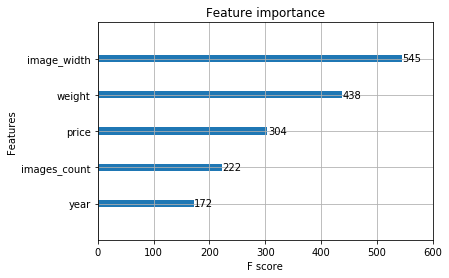

In [17]:
xgb.plot_importance(clf)
# xgb.plot_tree(bst, num_trees=2)
# xgb.to_graphviz(bst, num_trees=2)

### save model

In [18]:
clf.save_model('shoes_complementary_model')

### submission 

In [19]:
X_test = X_test[X_test.shoe_size.isnull()] # no shoes - rows
X_test = X_test[features] # no shoes column
df_test_num = X_test.select_dtypes(include=[np.number]) # only numeric

predicted_test_tr = clf.predict_proba(df_test_num)
predicted_test_tr

array([[0.33919397, 0.3254042 , 0.33540183],
       [0.31576192, 0.30891532, 0.3753227 ],
       [0.3121298 , 0.42561302, 0.2622572 ],
       ...,
       [0.3771087 , 0.31595346, 0.30693784],
       [0.35109028, 0.3371482 , 0.31176156],
       [0.3319085 , 0.31646726, 0.35162425]], dtype=float32)

In [20]:
pred_test = predicted_test_tr
df_submission = pd.DataFrame(pred_test, index=X_test.index)

In [21]:
df_submission.head()

,0,1,2
id,,,
0,0.339194,0.325404,0.335402
1,0.315762,0.308915,0.375323
2,0.312130,0.425613,0.262257
3,0.324125,0.291705,0.384169
4,0.313728,0.300166,0.386106


In [22]:
import io, math, requests

# Only works in Python3, see comment below for Python2
def submit_prediction(df, sep=',', **kwargs):
    # TOKEN to recover on the platform: "Submissions"> "Submit from your Python Notebook"
    TOKEN=''  
    URL='https://qscore.datascience-olympics.com/api/submissions'
    #buffer = io.BytesIO() # Python 2
    buffer = io.StringIO() # Python 3
    df.to_csv(buffer, sep=sep, **kwargs)
    buffer.seek(0)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': buffer})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)



In [23]:
#submit_prediction(df_submission, sep=',', index=True)